In [311]:
import pandas as pd
from matplotlib import pyplot
from pandas import to_datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.dates as mdates
from prophet import Prophet
from datetime import datetime
from pandas import DataFrame
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from prophet.plot import add_changepoints_to_plot

import warnings
warnings.filterwarnings("ignore")

### Reading Data
1. Read the already extracted data from NREL site and concatenate the 2019 and 2020 data.

In [312]:
df_2018 = pd.read_csv('../Data/dallas_solar_energy_2018.csv',index_col=False)
df_2019 = pd.read_csv('../Data/dallas_solar_energy_2019.csv',index_col=False)
df_2020 = pd.read_csv('../Data/dallas_solar_energy_2020.csv',index_col=False)
df_solar_raw = df_2018.append(df_2019, ignore_index=True)

In [313]:
df_solar_raw.to_csv('solar_2018_2019.csv',index=False)

### Formatting Data
1. Prophet needs data in a certain format. 

In [314]:
df_solar = df_solar_raw[['timestamp_solar','ghi']]
df_solar['Datetime'] = df_solar['timestamp_solar'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_solar= df_solar.drop(['timestamp_solar'],axis=1)
df_solar['Datetime'] = pd.to_datetime(df_solar['Datetime'])
df_solar.rename(columns = {'Datetime':'ds', 'ghi':'y'}, inplace = True)
df_solar['ds'] = pd.to_datetime(df_solar['ds'])

In [315]:
df_solar.tail()

,y,ds
35035,5.0,2019-12-31 21:30:00
35036,0.0,2019-12-31 22:00:00
35037,0.0,2019-12-31 22:30:00
35038,0.0,2019-12-31 23:00:00
35039,0.0,2019-12-31 23:30:00


Initial log joint probability = -1419.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       51734.6   0.000827624       192.163      0.2209           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         51737    0.00651264       249.639           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       51739.8   0.000912163       144.966           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       51740.1   0.000150064       195.776   1.874e-06       0.001      488  LS failed, Hessian reset 
     399       51740.1   2.98895e-05       74.7457      0.8072     0.08072      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     406       51740.1   1.22967e-06    

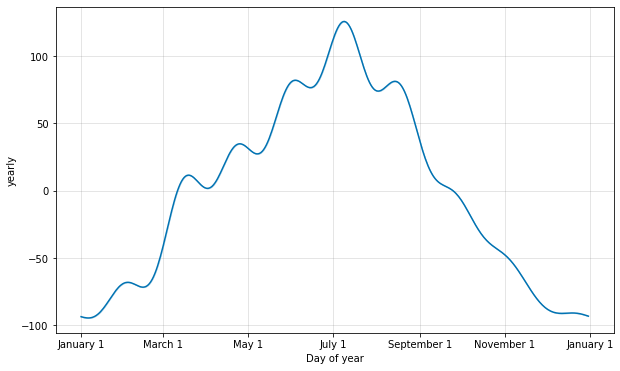

In [316]:
from prophet.plot import plot_yearly
m = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=True).fit(df_solar)
a = plot_yearly(m)

### Model 1

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -1419.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       51529.8     0.0175961       634.795           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       51558.6     0.0178023       516.972           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       51570.4     0.0375681       508.369           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       51576.2   0.000294288       134.399           1           1      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     433       51577.5   0.000494825       420.984   3.165e-06       0.001      572  LS failed, Hessian reset 
     499       51579.3    0.00150542    

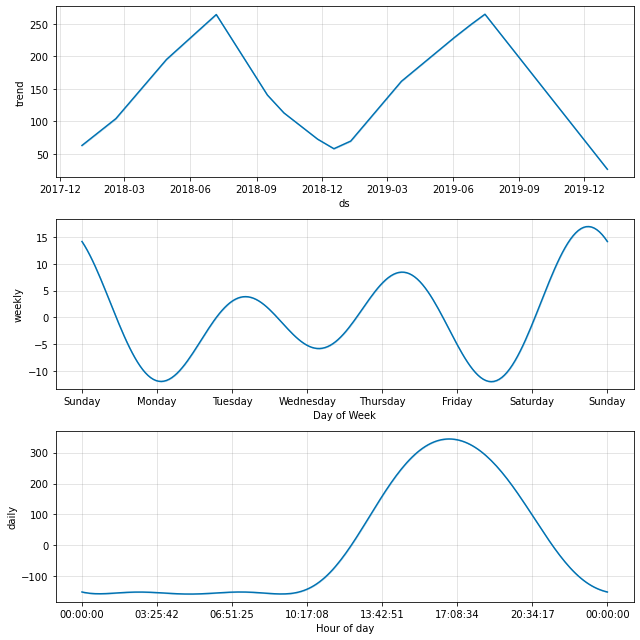

In [317]:
m1 = Prophet()
m1.fit(df_solar)
future = m1.make_future_dataframe(periods=48, freq='30min')
forecast1 = m1.predict(future)
fig = m1.plot_components(forecast1)

In [318]:
forecast1['yhat'] = forecast1['yhat'].apply(lambda x : x if x > 0 else 0)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(48)

,ds,yhat,yhat_lower,yhat_upper
35040,2020-01-01 00:00:00,0.000000,-297.523257,47.158960
35041,2020-01-01 00:30:00,0.000000,-309.725633,39.659730
35042,2020-01-01 01:00:00,0.000000,-304.891298,44.083092
35043,2020-01-01 01:30:00,0.000000,-291.195075,35.309026
35044,2020-01-01 02:00:00,0.000000,-312.668000,49.069897
35045,2020-01-01 02:30:00,0.000000,-316.920048,44.871404
35046,2020-01-01 03:00:00,0.000000,-317.598546,45.710737
35047,2020-01-01 03:30:00,0.000000,-311.723034,54.558894
35048,2020-01-01 04:00:00,0.000000,-315.316421,54.627610
35049,2020-01-01 04:30:00,0.000000,-312.394552,41.003143


In [319]:
print("R-Sq:", r2_score((df_2020['ghi'].head(48)), (forecast1['yhat'].tail(48))))
print("MAE:", mean_absolute_error((df_2020['ghi'].head(48)), (forecast1['yhat'].tail(48))))
print("RMSE:",np.sqrt(mean_squared_error((df_2020['ghi'].head(48)), (forecast1['yhat'].tail(48)))))

R-Sq: -1.8666631287240185
MAE: 58.78048884494216
RMSE: 105.68248225210111


### Model 2

Initial log joint probability = -1419.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       51734.6   0.000827624       192.163      0.2209           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         51737    0.00651264       249.639           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       51739.8   0.000912163       144.966           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       51740.1   0.000150064       195.776   1.874e-06       0.001      488  LS failed, Hessian reset 
     399       51740.1   2.98895e-05       74.7457      0.8072     0.08072      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     406       51740.1   1.22967e-06    

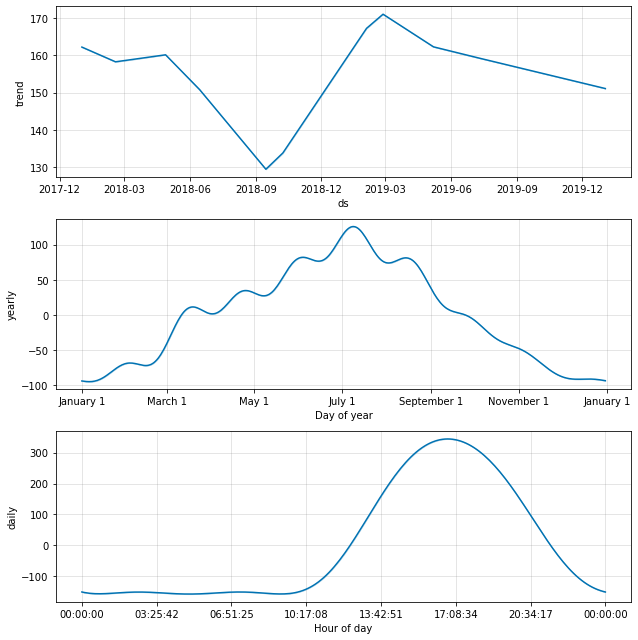

In [320]:
m2 = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=True)
m2.fit(df_solar)
future = m2.make_future_dataframe(periods=48, freq='30min')
forecast2 = m2.predict(future)
fig = m2.plot_components(forecast2)

In [321]:
forecast2['yhat'] = forecast2['yhat'].apply(lambda x : x if x > 0 else 0)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(48)

,ds,yhat,yhat_lower,yhat_upper
35040,2020-01-01 00:00:00,0.000000,-268.819450,80.975658
35041,2020-01-01 00:30:00,0.000000,-279.420321,61.466919
35042,2020-01-01 01:00:00,0.000000,-276.430784,72.226792
35043,2020-01-01 01:30:00,0.000000,-273.046649,77.135652
35044,2020-01-01 02:00:00,0.000000,-266.336939,95.771286
35045,2020-01-01 02:30:00,0.000000,-268.839591,79.433614
35046,2020-01-01 03:00:00,0.000000,-268.227333,89.888795
35047,2020-01-01 03:30:00,0.000000,-267.101136,87.046246
35048,2020-01-01 04:00:00,0.000000,-269.181221,87.944437
35049,2020-01-01 04:30:00,0.000000,-290.519409,71.060703


In [322]:
print("R-Sq:", r2_score((df_2020['ghi'].head(48)), (forecast2['yhat'].tail(48))))
print("MAE:", mean_absolute_error((df_2020['ghi'].head(48)), (forecast2['yhat'].tail(48))))
print("RMSE:",np.sqrt(mean_squared_error((df_2020['ghi'].head(48)), (forecast2['yhat'].tail(48)))))

R-Sq: -2.860542372695052
MAE: 71.37046112553683
RMSE: 122.64189061770344


### Model 3

Initial log joint probability = -1546.68
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       51541.5   1.24748e-06        149.57   5.125e-09       0.001      188  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


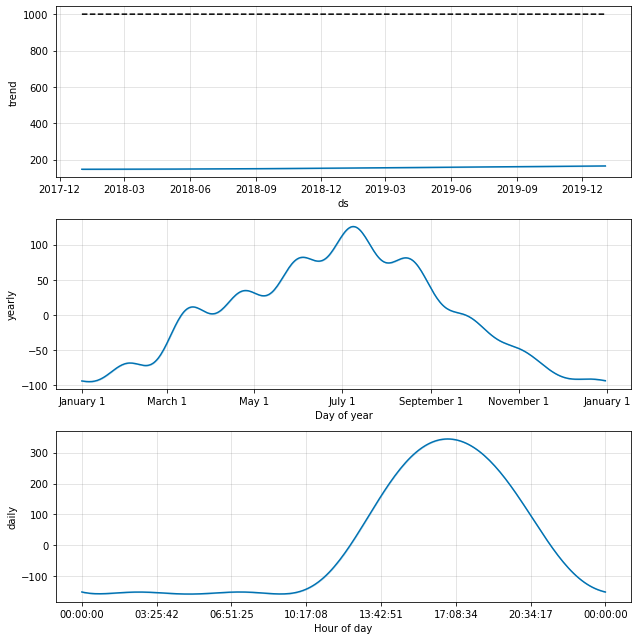

In [323]:
df_solar['cap']=1000
m3 = Prophet(growth='logistic', weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=True)
m3.fit(df_solar)
future = m3.make_future_dataframe( periods=48, freq='30min')
future['floor']=0
future['cap']=1000
forecast3 = m3.predict(future)
fig = m.plot_components(forecast3)

In [324]:
forecast3['yhat'] = forecast3['yhat'].apply(lambda x : x if x > 0 else 0)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(48)

,ds,yhat,yhat_lower,yhat_upper
35040,2020-01-01 00:00:00,0.000000,-262.492123,97.701152
35041,2020-01-01 00:30:00,0.000000,-264.242304,98.951929
35042,2020-01-01 01:00:00,0.000000,-267.069986,108.084774
35043,2020-01-01 01:30:00,0.000000,-249.752220,89.678939
35044,2020-01-01 02:00:00,0.000000,-257.526397,94.981380
35045,2020-01-01 02:30:00,0.000000,-243.957029,109.110827
35046,2020-01-01 03:00:00,0.000000,-265.230953,98.873608
35047,2020-01-01 03:30:00,0.000000,-271.148293,96.804483
35048,2020-01-01 04:00:00,0.000000,-263.898032,93.001151
35049,2020-01-01 04:30:00,0.000000,-255.972783,98.560009


In [325]:
print("R-Sq:", r2_score((df_2020['ghi'].head(48)), (forecast3['yhat'].tail(48))))
print("MAE:", mean_absolute_error((df_2020['ghi'].head(48)), (forecast3['yhat'].tail(48))))
print("RMSE:",np.sqrt(mean_squared_error((df_2020['ghi'].head(48)), (forecast3['yhat'].tail(48)))))

R-Sq: -3.512166977909734
MAE: 78.76107387552732
RMSE: 132.58892715149594


### Model 4

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


Initial log joint probability = -1419.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       33727.7   0.000636056       860.643      0.2044      0.2044      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       33737.2    0.00445944       374.209           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       33743.2     0.0023586       223.033       2.356      0.2356      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       33744.1   9.01105e-05       278.353    3.92e-07       0.001      417  LS failed, Hessian reset 
     399       33746.9   0.000724748       357.263           1           1      540   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       33749.4    0.00036409    

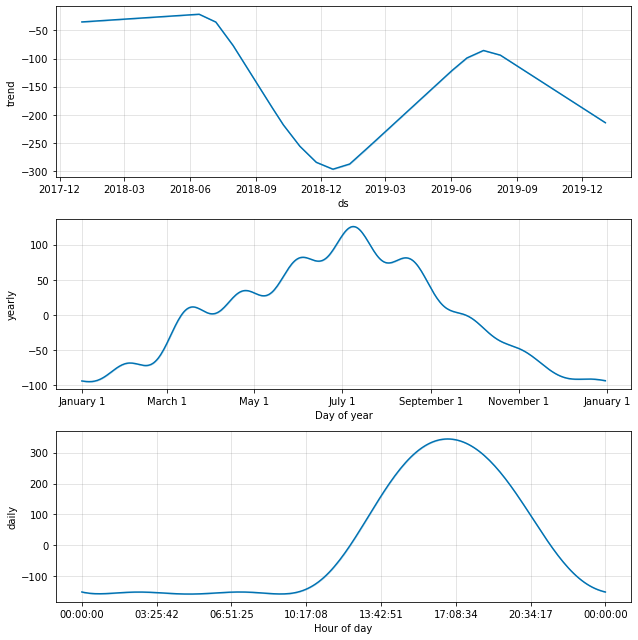

In [326]:
m4 = Prophet(weekly_seasonality=False)
m4.add_seasonality(name='daily', period=48, fourier_order=1)
m4.add_seasonality(name='yearly', period=17532, fourier_order=10)
m4.fit(df_solar)
future = m4.make_future_dataframe( periods=48, freq='30min')
forecast4 = m4.predict(future)
fig = m.plot_components(forecast4)

In [327]:
forecast4['yhat'] = forecast4['yhat'].apply(lambda x : x if x > 0 else 0)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(48)

,ds,yhat,yhat_lower,yhat_upper
35040,2020-01-01 00:00:00,25.274418,-269.321155,303.066206
35041,2020-01-01 00:30:00,25.245507,-294.829753,292.999318
35042,2020-01-01 01:00:00,25.216605,-272.222124,329.561078
35043,2020-01-01 01:30:00,25.187710,-263.983259,340.528373
35044,2020-01-01 02:00:00,25.158824,-269.387602,329.743882
35045,2020-01-01 02:30:00,25.129947,-259.447893,308.686013
35046,2020-01-01 03:00:00,25.101077,-256.947643,322.100032
35047,2020-01-01 03:30:00,25.072216,-267.661077,318.079381
35048,2020-01-01 04:00:00,25.043363,-272.799236,337.277144
35049,2020-01-01 04:30:00,25.014518,-262.727998,315.963015


In [328]:
print("R-Sq:", r2_score((df_2020['ghi'].head(48)), (forecast4['yhat'].tail(48))))
print("MAE:", mean_absolute_error((df_2020['ghi'].head(48)), (forecast4['yhat'].tail(48))))
print("RMSE:",np.sqrt(mean_squared_error((df_2020['ghi'].head(48)), (forecast4['yhat'].tail(48)))))

R-Sq: -0.033217446703588616
MAE: 42.4951627816609
RMSE: 63.44691945278145
